# En los ultimos 30 años han disminuido las emisiones de Co2 mundialmente ?

## Abstract

Se presenta un modelo, donde a traves de los datos presentados vamos a poder saber, como las emisiones de Co2 se han comportado a lo largo del tiempo,
tambien a traves del modelo vamos a poder estimar si las disminuciones continuaran o descenderan en el tiempo


## Objetivo

Generar un modelo que pueda predecir si las emisiones disminuiran o aumentaran

Como parte de las iniciativas de los gobiernos, sabemos que se estan realizando campañas y aplicando nuevas politicas para el cese de las emisiones de Co2, queremos saber que tan real es esto en el tiempo

## Problema comercial

Sabemos que a pesar de que se quieran aplicar nuevas politicas y camapañas, muchas veces esto no puede ser realizado en una eficacia del 100% real, ya que muchas veces se enfretan a grandes problemas burocracticos

## Librerias

***Importamos las bibliotecas necesarias***

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
sklearn.__version__

'1.0.2'

# Introducción

# Contexto 

En las últimas tres décadas, las emisiones de dióxido de carbono (CO2) a nivel mundial han experimentado un aumento constante. Según el Informe de Evaluación Global del Cambio Climático de 2021 del Grupo Intergubernamental de Expertos sobre el Cambio Climático (IPCC), entre los años 2010 y 2019 las emisiones globales de CO2 aumentaron anualmente en un promedio del 1.5%.

Este mismo informe evidencia que las emisiones de gases de efecto invernadero (GEI) de origen humano constituyen la causa principal del calentamiento global que se ha observado en las últimas décadas. Desde la Revolución Industrial, las emisiones de GEI han experimentado un incremento significativo, debido al empleo de combustibles fósiles como el petróleo, el gas y el carbón, así como a la deforestación y a la agricultura intensiva.

El aumento en las emisiones de CO2 ha llevado a un incremento en la temperatura global promedio, lo que ha generado impactos notorios en el clima, como el aumento del nivel del mar, la acidificación de los océanos y el incremento de eventos climáticos extremos como huracanes, sequías e inundaciones.

Con la finalidad de mitigar este problema, diversos países han adoptado medidas para reducir las emisiones de GEI, tales como el fomento de fuentes de energía renovable, la optimización de la eficiencia energética y la adopción de prácticas agrícolas más sostenibles. Sin embargo, a pesar de estos esfuerzos, la reducción de las emisiones globales de GEI sigue siendo un desafío importante.

# Contexto analítico

En el marco de este estudio, se recopilaron datos sobre las emisiones de CO2 a nivel mundial a partir de un archivo CSV disponible en GitHub. Estos datos fueron extraídos de Kaggle y consisten en emisiones de CO2 por caída país, medidas en unidades métricas por persona. Los datos fueron recolectados a través del World Data Bank.

1) Se extraen los datos a partir de un archivo CSV
2) Se leen y transforman los mimsos y se preparan los datos para su visualización
3) Se procede a realizar un análisis y a construir visualizaciones de los datos para identificar patrones en el conjunto de datos

Para el presente trabajo se extrajo información de emisiones de Co2 a nivel mundial.

Estos datos fueron extraídos de Kaggle. El Dataset presente consiste en emisiones de Co2 en medida (metricon) per cápita por caída país alrededor del mundo. Estos datos fueron recolectados a través desde World Data Bank.

***Links:***

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC

https://www.kaggle.com/datasets/koustavghosh149/co2-emission-around-the-world

# Hipótesis

El presente estudio tiene como hipótesis que, mediante el análisis y la visualización de los datos, será posible obtener información valiosa y fiable para determinar si las emisiones de CO2 han disminuido con el tiempo y en qué países se observa una tendencia al alza en los niveles de contaminación a lo largo del tiempo.

***Obtencion de datos relevantes***

Los datos se almacenan en un archivo CSV, en el cual mediante librerias en cojunto con Python nos seran de grana ayuda para otener los mismos



***De que manera se obtienen los datos ?***

In [81]:
url='/Users/user/Downloads/SegundaEntregaCoder/GCB2022v27_MtCO2_flat.csv'
df=pd.read_csv('/Users/user/Downloads/SegundaEntregaCoder/GCB2022v27_MtCO2_flat.csv')

Se obtienen los datos mediante la funcion df=pd.read_csv llamando a la URL que es la ruta donde se encuentra alojado nuestro CSV

# ANALISIS EDA

***OVERVIEW de la data :***

***DATA WRANGLING***

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


***La funcion df.shape nos brinda el tamaño de nuestro DataFrame***

In [83]:
df.shape

(63104, 11)

***Con la funcion df.columns las columnas que poseemos***

In [84]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

***Tenemos las siguientes columnas***

Country: El nombre del pais. (String)

ISO 3166-1 alpha-3: El codigo de tres letras para el pais. (String)

Year: El año del dato. (Integer)

Total: El total de emisiones de Co2 para dicho pais en el el año dado. (Float)

Coal: El monto total de emisiones de Co2 de carbon para el pais en el año dado. (Float)

Oil: El monto total de emisiones de Co2 de petroleo para el pais en el año dado. (Float)

Gas: El monto total de emisiones de Co2 de gas para el pais en el año dado. (Float)

Cement: El monto total de emisiones de Co2 de cemento para el pais en el año dado. (Float)

Flaring: El monto total de emisiones de Co2 de antorcha para el pais en el año dado. (Float)

Other: El monto total de emisiones de Co2 de otras elementos para el pais en el año dado. (Float)

Per Capita: El monto total de emisiones de Co2 de Per Capita para el pais en el año dado. (Float)

***COMENZAMOS A CORROBORAR VALORES NULOS***

In [85]:
df.isna().any()

Country               False
ISO 3166-1 alpha-3     True
Year                  False
Total                  True
Coal                   True
Oil                    True
Gas                    True
Cement                 True
Flaring                True
Other                  True
Per Capita             True
dtype: bool

In [86]:
df.isna().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

***Comprobamos de que el dataset no tenga datos NaN, nos damos cuenta que disponemos de muchos datos nulos, los mismos se encuentran en las columnas y su valores son:***

ISO 3166-1 alpha-3:    1632

Total:                 200

Coal:                  41360

Oil:                   41387

Gas:                   41486

Cement:                42290

Flaring:               41554

Other:                 61484

Per Capita:            44130

***Limpiamos valores Nulos***

Podria parecer que limpiar los datos nulos simplmente con DropaNa seria un tanto extremo, pero consideramos que en valores de contaminacion no podemos pensar en medianas etc al momento de modificar un dato, ya que si remplazaramos los mismos habrian cambios significativos ya que estamos hablando de emisiones de Co2 y no por ejemplo como podria ser el caso de creditos etc.

***Eliminamos los datos nulos con la siguiente funcion***

In [87]:
df=df.dropna()

***Corroboramos no tener datos nulos***

In [88]:
df.isna().sum()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

***Procedemos a chequear que no hayan valores duplicados***

In [89]:
df.duplicated().value_counts()

False    1619
dtype: int64

***Procedemos a eliminar los duplicamos***

In [90]:
df = df.drop_duplicates()

***Con esta pequeño condicional nos sercioramos de que no hayan duplicados***

In [91]:
if df.duplicated().any():
    print("Hay duplicados en el DataFrame.")
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


***Mostramos las primeras tres filas del Data Frame***

In [92]:
df.head(3)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502


***Identificamos la correlacion entre variables***

<AxesSubplot:>

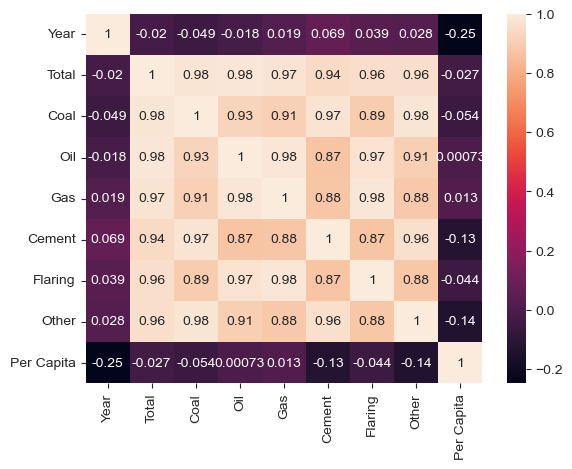

In [93]:
correlation_matrix = df.corr() # calcula la matriz de correlación
sns.heatmap(correlation_matrix, annot=True) # muestra un mapa de calor de la matriz de correlación

***PREGUNTAS A ANALIZAR***

Que paises son los mayores emisores de Co2 ?

Cuáles son los cinco países con mayores emisiones de CO2 en los últimos 35 años ?

Cuáles son las principales fuentes de emisiones de CO2 en cada uno de estos países ?

Cuál es la tendencia de las emisiones de CO2 en estos países en los últimos años ?

***GRAFICA TOP 5 PAISES DE MAYORES EMISIONES DE Co2***

# Analisis univariado

Realizamos un analisis univariado en el cual graficamos los 5 principales paises emisores de Co2 y un dato global del total de contaminacion de los anteriormente mencionados paises 

<AxesSubplot:>

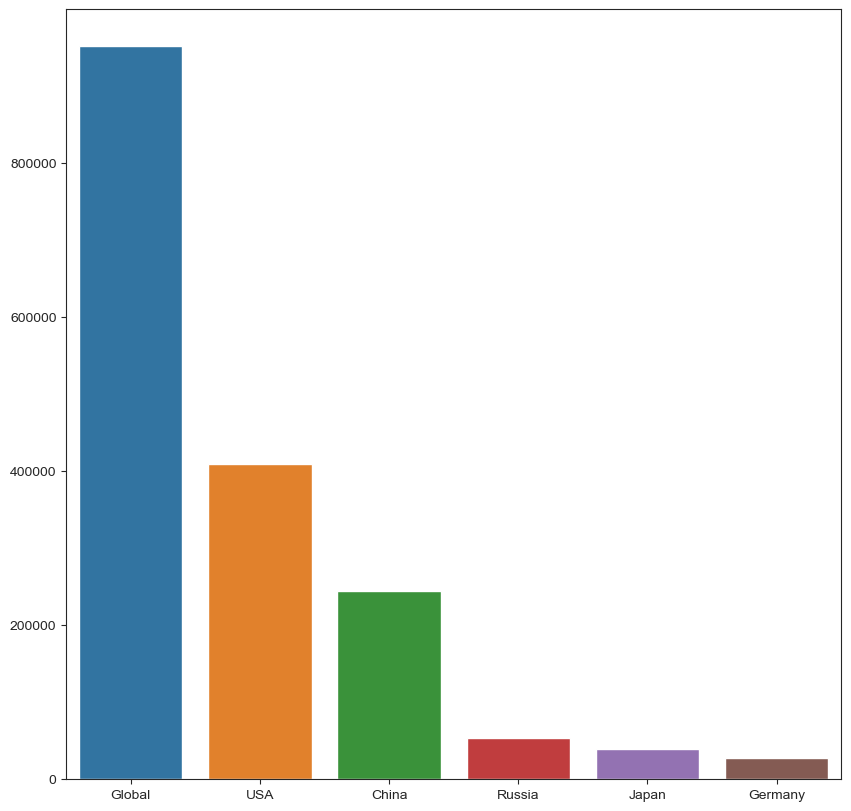

In [94]:
paises=list(df.groupby('Country').sum().sort_values(by='Total', ascending=False).index) 
valores=list(df.groupby('Country').sum().sort_values(by='Total', ascending=False)['Total']) 
plt.figure(figsize=(10,10)) 
sns.set_style('ticks')
sns.barplot(x=paises[:6],y= valores[:6])

# Analisis Vibariado

***Procederemos a graficar las emisiones de los TOP 5 paises del dataframe a lo largo de 35 años de manera individual, al finalizar con un grafico de lineas graficaremos a los 5 paises para esta manera poder visualizar de mejor manera de que manera se diferencian entre si en sus emisiones***

***GRAFICOS DE BARRAS***

Text(0, 0.5, 'Total')

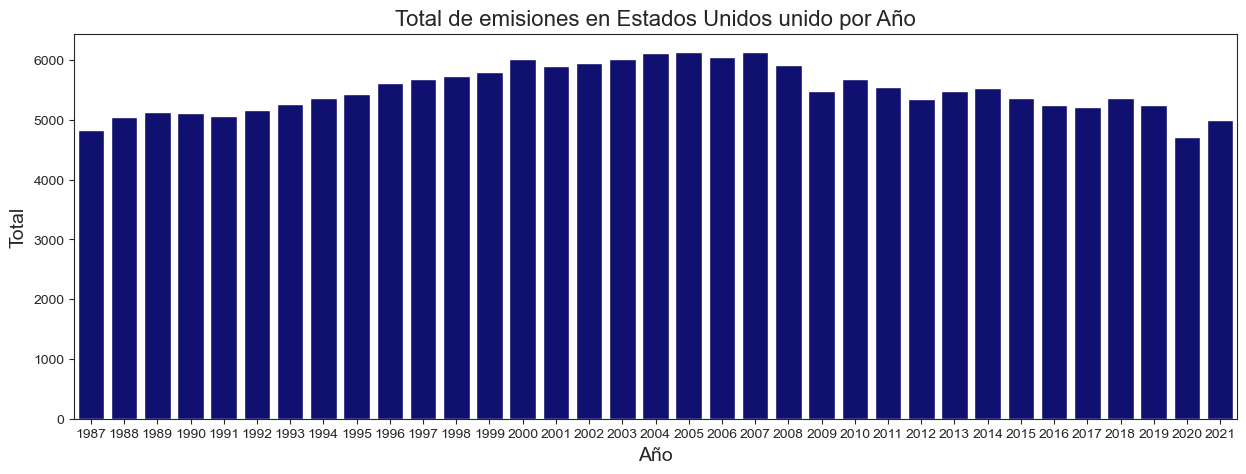

In [95]:
usa = df[df['Country']=='USA']
USA_data = usa[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=USA_data, color='navy')
plt.title('Total de emisiones en Estados Unidos unido por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total', fontsize=14)


***RESUMEN NUMERICO***

Como se puede observar, la producción de energía a partir de combustibles fósiles como el petróleo, el gas natural y el carbón representa más del 75% de la producción total de energía en los Estados Unidos en 2020. Los combustibles fósiles son los principales emisores de CO2, y su uso contribuye significativamente al calentamiento global y el cambio climático.

Si bien la producción de energía a partir de fuentes renovables, como la energía hidroeléctrica, eólica y solar, ha aumentado en los últimos años, sigue siendo una pequeña proporción de la producción total de energía. Esto sugiere que, aunque se están realizando avances en la transición hacia fuentes de energía más limpias y renovables, todavía hay un largo camino por recorrer en la reducción de las emisiones de CO2 de los Estados Unidos.

Es importante destacar que los Estados Unidos son uno de los mayores emisores de CO2 del mundo, y la reducción de las emisiones de gases de efecto invernadero es una prioridad tanto para el gobierno como para muchas empresas y organizaciones en el país. El compromiso de los Estados Unidos con la energía limpia y la reducción de las emisiones de CO2 es fundamental para abordar el cambio climático a nivel mundial.







Text(0, 0.5, 'Total')

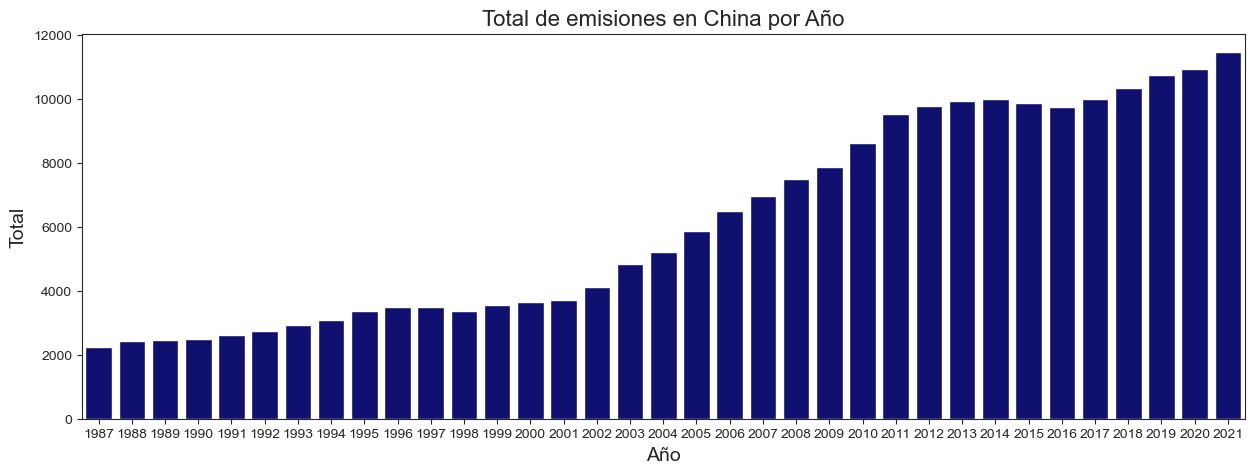

In [96]:
china = df[df['Country']=='China']
China_data = china[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='Total', data=China_data, color='navy')
plt.title('Total de emisiones en China por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total', fontsize=14)

***RESUMEN NUMERICO***

Se puede observar que las emisiones de CO2 de China han experimentado un crecimiento significativo durante este período. En 1990, China emitió alrededor de 2,7 mil millones de toneladas de CO2, mientras que en 2018 las emisiones alcanzaron alrededor de 10,1 mil millones de toneladas, lo que representa un aumento de casi cuatro veces en 28 años.

Sin embargo, también es importante tener en cuenta que las emisiones de CO2 de China se han estabilizado en los últimos años y que el país ha implementado una serie de políticas para reducir su huella de carbono, como la promoción de energías renovables y la inversión en tecnologías más limpias. A pesar de esto, China sigue siendo el mayor emisor de CO2 del mundo y, por lo tanto, desempeña un papel clave en la lucha contra el cambio climático a nivel global.

Text(0, 0.5, 'Total')

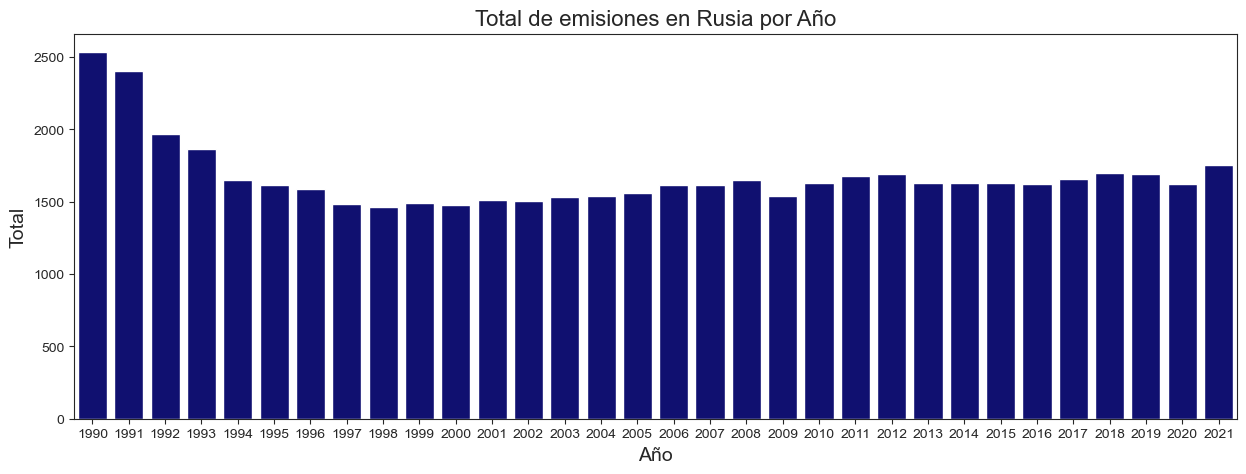

In [97]:
russia = df[df['Country']=='Russia']
Russia_data = russia[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=Russia_data, color='navy')
plt.title('Total de emisiones en Rusia por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total', fontsize=14)

***RESUMEN NUMERICO***

Se puede observar que las emisiones de CO2 de Rusia han aumentado significativamente desde la década de 1990 donde alcanzo su punto maximo antes de disminuir ligeramente en los últimos años.

Rusia es uno de los mayores emisores de CO2 del mundo debido a su dependencia de la industria del petróleo y el gas, que es una de las principales fuentes de emisiones de CO2. También cuenta con una gran cantidad de centrales eléctricas de carbón, lo que contribuye aún más a sus emisiones.

Es importante destacar que, a pesar del aumento en las emisiones de CO2, Rusia ha establecido objetivos ambiciosos para reducir sus emisiones de gases de efecto invernadero. En 2020, el gobierno de Rusia anunció planes para reducir las emisiones de gases de efecto invernadero en un 30% para 2030 en comparación con los niveles de 1990.

Es importante destacar que la disminución reciente de las emisiones de CO2 de Rusia podría deberse en parte a la crisis económica que afectó al país en la década de 2010, así como a la reducción de la producción de petróleo y gas. A medida que la economía de Rusia se recupera y la producción de petróleo y gas se expande nuevamente, podría haber un aumento en las emisiones de CO2. Por lo tanto, es fundamental que Rusia continúe implementando políticas y estrategias para reducir sus emisiones de gases de efecto invernadero y avanzar hacia una economía más limpia y sostenible.

Text(0, 0.5, 'Total')

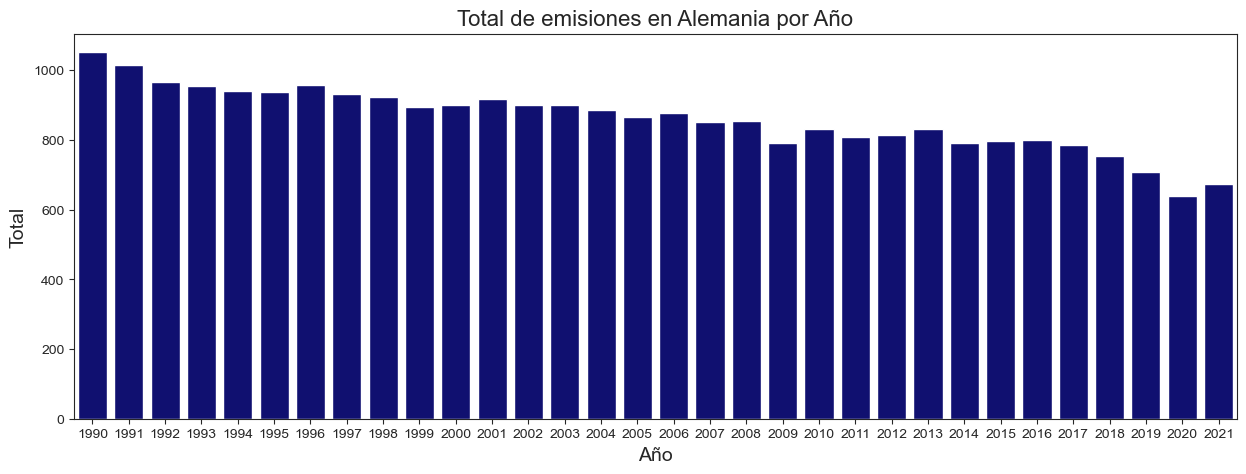

In [98]:
germany = df[df['Country']=='Germany']
Germany_data = germany[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=Germany_data, color='navy')
plt.title('Total de emisiones en Alemania por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total', fontsize=14)

***RESUMEN NUMERICO***

Se puede observar que las emisiones de CO2 de Alemania han disminuido en los últimos años después de alcanzar su punto máximo en la década de 1990.

Alemania es uno de los mayores emisores de CO2 de Europa debido a su dependencia del carbón y otros combustibles fósiles para la generación de energía y la producción industrial. Sin embargo, en los últimos años, Alemania ha realizado importantes inversiones en energía renovable, lo que ha llevado a una disminución de las emisiones de CO2.

En particular, Alemania ha establecido objetivos ambiciosos para la transición energética, con el objetivo de obtener el 80% de su electricidad a partir de fuentes renovables para 2050. Además, Alemania ha implementado políticas para reducir el consumo de energía y mejorar la eficiencia energética en edificios y procesos industriales.

Aunque la disminución reciente en las emisiones de CO2 de Alemania es alentadora, sigue siendo un importante emisor de gases de efecto invernadero y aún queda mucho por hacer para alcanzar sus objetivos climáticos. Además, la pandemia de COVID-19 también ha tenido un impacto en la reducción de las emisiones de CO2 de Alemania en 2020, y es importante que el país continúe trabajando en la transición energética y la reducción de emisiones en el futuro.






Text(0, 0.5, 'Total')

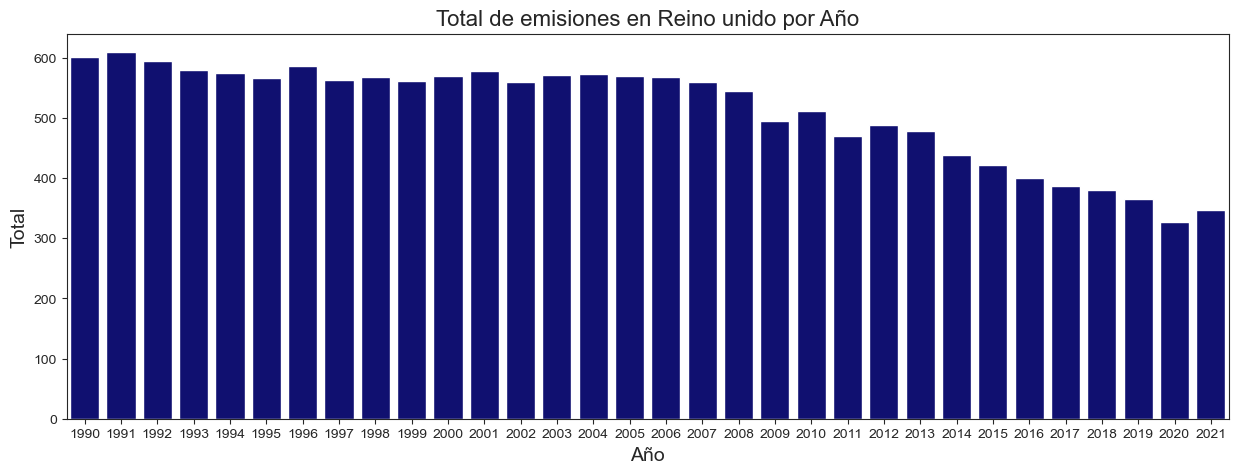

In [99]:
unitedKingdom = df[df['Country']=='United Kingdom']
unitedKingdom_data = unitedKingdom[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=unitedKingdom_data, color='navy')
plt.title('Total de emisiones en Reino unido por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Total', fontsize=14)

Se puede observar que las emisiones de CO2 del Reino Unido han disminuido en los últimos años, alcanzando su punto más bajo en la década de 2020.

El Reino Unido es uno de los líderes en la lucha contra el cambio climático y ha establecido objetivos ambiciosos para reducir sus emisiones de gases de efecto invernadero. En 2008, el Reino Unido aprobó la Ley de Cambio Climático, que estableció un objetivo legalmente vinculante para reducir las emisiones de gases de efecto invernadero en un 80% para 2050 en comparación con los niveles de 1990.

Para lograr este objetivo, el Reino Unido ha implementado políticas y programas que han llevado a una disminución en las emisiones de CO2. Estos incluyen la inversión en energía renovable, la mejora de la eficiencia energética en edificios y procesos industriales, y la implementación de un impuesto sobre el carbono.

Es importante destacar que la disminución reciente en las emisiones de CO2 del Reino Unido también ha sido influenciada por la pandemia de COVID-19, que ha llevado a una reducción temporal en la actividad económica y, por lo tanto, en las emisiones de gases de efecto invernadero.

En general, el Reino Unido ha logrado importantes avances en la reducción de sus emisiones de CO2, pero aún queda mucho por hacer para alcanzar sus objetivos climáticos a largo plazo. Es fundamental que el país continúe implementando políticas y estrategias para reducir sus emisiones de gases de efecto invernadero y avanzar hacia una economía más limpia y sostenible.

# GRAFICAS LINEALES

# Comparación de paises por el total de sus emisiones de Co2

***Guía de colores***

Naranja: Estados Unidos

Azul: China

Russia: Verde 

Alemania: Rojo

Reino Unido: Violeta

<AxesSubplot:xlabel='Year', ylabel='Total'>

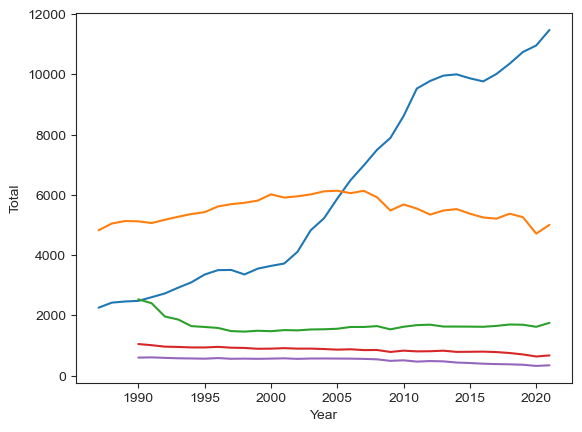

In [100]:
sns.lineplot(x='Year',y='Total',data=China_data)
sns.lineplot(x='Year',y='Total',data=USA_data)
sns.lineplot(x='Year',y='Total',data=Russia_data)
sns.lineplot(x='Year',y='Total',data=Germany_data)
sns.lineplot(x='Year',y='Total',data=unitedKingdom_data)




# Conclusión

En el gráfico que se presento, se realiza una comparativa detallada entre los diferentes países en cuanto a sus emisiones de CO2. Se observa que China presenta una tendencia al alza en sus emisiones, mientras que Estados Unidos se mantiene en un mismo rango, con una ligera disminución, siendo el país que más emisiones de CO2 presenta. Por su parte, Rusia presenta una tendencia a la baja con un pico hacia el año 2020. Alemania y el Reino Unido presentan de manera similar sus emisiones, siendo menores en este último.

En el año 2019, los países mencionados emitieron en millones de toneladas métricas (Mt) los siguientes valores de CO2:
China: 10,175.38 Mt
Estados Unidos: 5,416.01 Mt
Alemania: 729.41 Mt
Reino Unido: 354.45 Mt
Rusia: 1,668.77 Mt

Por lo tanto, en términos de emisiones absolutas de CO2, China y Estados Unidos son los mayores emisores, seguidos por Rusia, Alemania y el Reino Unido.

Sin embargo, cuando se consideran las emisiones per cápita, es decir, las emisiones por persona, la clasificación es diferente. Según datos del Banco Mundial correspondientes a 2019, la emisión de CO2 per cápita en toneladas métricas (t) para los países mencionados fue la siguiente:
China: 7.08 t
Estados Unidos: 16.24 t
Alemania: 8.69 t
Reino Unido: 5.25 t
Rusia: 11.54 t

En términos de emisiones per cápita, Estados Unidos es el mayor emisor, seguido por Rusia, Alemania, China y el Reino Unido. Es importante tener en cuenta que, en general, los países con mayor desarrollo económico suelen presentar mayores emisiones per cápita.

Cabe señalar que la emisión de CO2 no es el único factor relevante para evaluar la huella de carbono de un país o región, ya que existen otros gases de efecto invernadero y otros factores ambientales a considerar. Asimismo, es importante considerar el tamaño de la población y la economía de cada país.

***Aqui debajo agregamos un grafico para tener los datos aun más detallados interactivamente***

Importamos la libreria de plotly.express para realizar la misma

In [101]:
import plotly.express as px

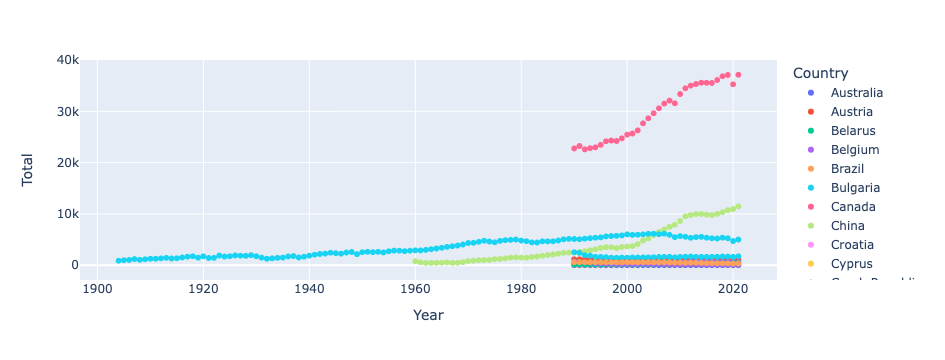

In [102]:
fig = px.scatter(df, x="Year", y="Total", color ='Country')
fig.show()

# Graficas de fuentes principales de emsiones de Co2 por cada país del top 5

***Guia de colores***

Coal: Azul

Oil: Naranja

Cement: Rojo

Falring: Violeta

<AxesSubplot:xlabel='Total', ylabel='Coal'>

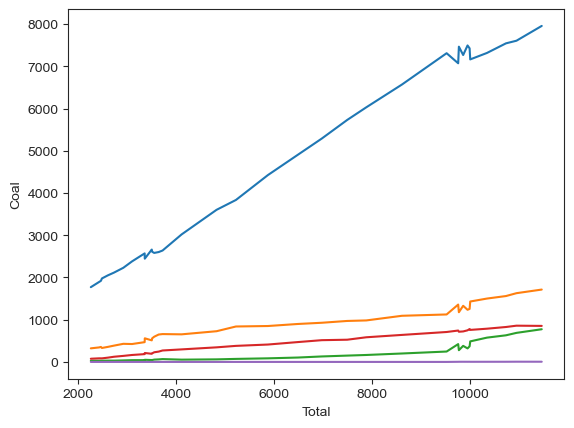

In [103]:
sns.lineplot(x='Total',y='Coal',data=China_data)
sns.lineplot(x='Total',y='Oil',data=China_data)
sns.lineplot(x='Total',y='Gas',data=China_data)
sns.lineplot(x='Total',y='Cement',data=China_data)
sns.lineplot(x='Total',y='Flaring',data=China_data)

***En China se puede observar que Coal (Cobalto) es la mayor fuente de contaminación***

<AxesSubplot:xlabel='Total', ylabel='Coal'>

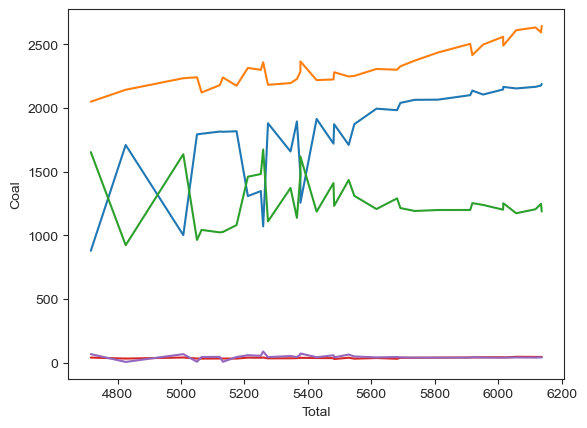

In [104]:
sns.lineplot(x='Total',y='Coal',data=USA_data)
sns.lineplot(x='Total',y='Oil',data=USA_data)
sns.lineplot(x='Total',y='Gas',data=USA_data)
sns.lineplot(x='Total',y='Cement',data=USA_data)
sns.lineplot(x='Total',y='Flaring',data=USA_data)

***En Estados Unidos se puede observar que Oil (Petroleo) es la mayor fuente de contaminación***

<AxesSubplot:xlabel='Total', ylabel='Coal'>

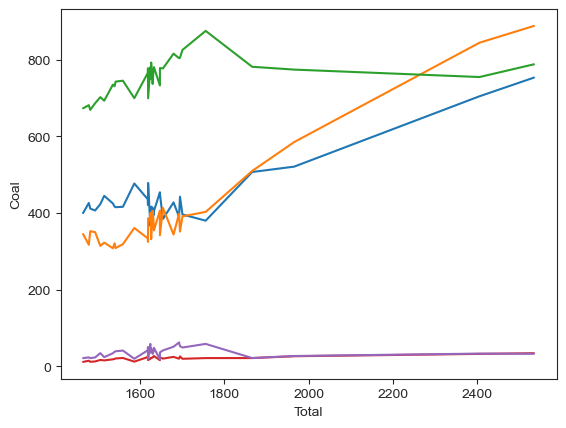

In [105]:
sns.lineplot(x='Total',y='Coal',data=Russia_data)
sns.lineplot(x='Total',y='Oil',data=Russia_data)
sns.lineplot(x='Total',y='Gas',data=Russia_data)
sns.lineplot(x='Total',y='Cement',data=Russia_data)
sns.lineplot(x='Total',y='Flaring',data=Russia_data)

***En Rusia se puede observar que Oil (Petroleo) es la mayor fuente de contaminación***

<AxesSubplot:xlabel='Total', ylabel='Coal'>

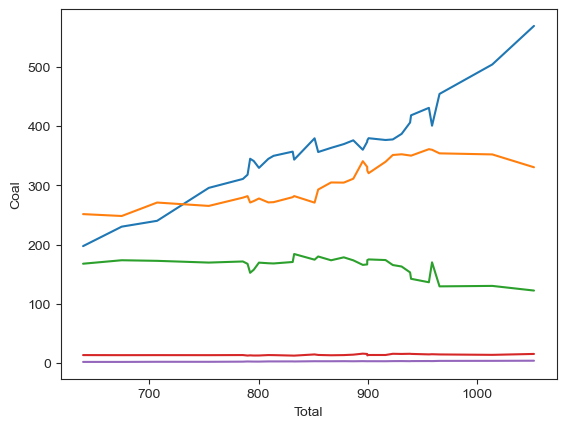

In [106]:
sns.lineplot(x='Total',y='Coal',data=Germany_data)
sns.lineplot(x='Total',y='Oil',data=Germany_data)
sns.lineplot(x='Total',y='Gas',data=Germany_data)
sns.lineplot(x='Total',y='Cement',data=Germany_data)
sns.lineplot(x='Total',y='Flaring',data=Germany_data)

***En Alemania se puede observar que Coal (Cobalto) es la mayor fuente de contaminación***

<AxesSubplot:xlabel='Total', ylabel='Coal'>

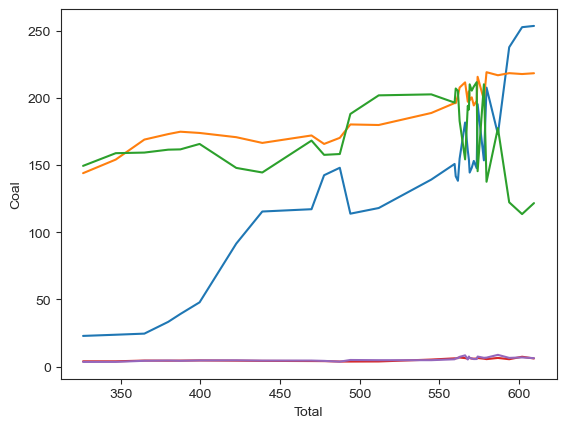

In [107]:
sns.lineplot(x='Total',y='Coal',data=unitedKingdom_data)
sns.lineplot(x='Total',y='Oil',data=unitedKingdom_data)
sns.lineplot(x='Total',y='Gas',data=unitedKingdom_data)
sns.lineplot(x='Total',y='Cement',data=unitedKingdom_data)
sns.lineplot(x='Total',y='Flaring',data=unitedKingdom_data)

***En Reino Unido se puede observar que Coal (Cobalto) es la mayor fuente de contaminación***

# Comenzamos a aplicar IA

Primeramente nos encargamos que los datos que posean valores numericos, en este caso binarios con la funcion get_dummies

In [108]:
df=pd.get_dummies(df, columns=['ISO 3166-1 alpha-3'], drop_first=True)
df=pd.get_dummies(df, columns=['Country'], drop_first=True)

Separamos los datos de entrenamientos que en este caso es el Total

In [109]:
X = df.drop('Total', axis=1)       # feature matrix
y = df['Total']               # target feature

Procedemos a ver que nos apartamos el eje Y el cual es de nuestro interes

In [110]:
y

3232       278.154156
3233       279.528510
3234       284.525345
3235       288.870537
3236       293.696553
             ...     
63099    36096.739276
63100    36826.506600
63101    37082.558969
63102    35264.085734
63103    37123.850352
Name: Total, Length: 1619, dtype: float64

# Metodo

Elegimos un metodo de regresion ya que el target sobre el que trabajo es total

# Metricas

In [111]:
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
import sys
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
 

In [113]:
sfs1=SFS(LinearRegression(),
         k_features=5,
         forward=True,
         floating=False,
         scoring='r2',
         cv=2)

sfs1.fit(X_train,y_train)
df1=df[list(sfs1.k_feature_names_)]
df1

,Coal,Oil,Gas,Cement,Flaring
3232,141.879819,88.842090,34.454816,3.462872,7.272496
3233,146.082840,88.245572,32.786243,3.183033,7.001201
3234,150.051381,87.916828,33.970472,2.923411,7.303701
3235,150.098575,90.386578,35.670002,3.004698,7.136743
3236,151.376241,91.924087,37.032005,3.484276,6.880148
...,...,...,...,...,...
63099,14506.973805,12242.627935,7144.928128,1507.923185,391.992176
63100,14746.830688,12266.016285,7529.846784,1569.218392,412.115746
63101,14725.978025,12345.653374,7647.528220,1617.506786,439.253991
63102,14174.564010,11191.808551,7556.290283,1637.537532,407.583673


In [114]:
sfs1.k_feature_names_

('Coal', 'Oil', 'Gas', 'Cement', 'Flaring')

***Entrenamiento***

In [115]:
X = df[['Coal',
 'Oil',
 'Gas',
 'Cement',
 'Flaring']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Coeficientes:', reg.coef_)
print('Intercepto:', reg.intercept_)
print('R^2:', reg.score(X_test, y_test))

Coeficientes: [1.01395156 1.00887364 0.97764948 1.06460015 1.13453866]
Intercepto: 1.0850332035811334
R^2: 0.9999974218528245


In [116]:
lr=LinearRegression()

In [117]:
lr.fit(X_train,y_train)

LinearRegression()

***Test***

In [118]:
y_pred = lr.predict(X_test)

***CALCULAMOS MAE***

In [119]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 3.1212385083989505


***CALCULAMOS R2***

In [120]:
print("R2",r2_score(y_test,y_pred))

R2 0.9999974218528245


***R2 se Aproxima bastante bien a 1 por lo indica que el modelo esta bien***

***CALCULAMOS MSE***

In [121]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 42.77550163111203


# Evaluando modelos ML

***Resultados de Test***

MAE 3.1212385083989505

R2 0.9999974218528245

MSE 42.77550163111203


***Resultados de Entrenamiento*** 

Coeficientes: [1.01395156 1.00887364 0.97764948 1.06460015 1.13453866]

Intercepto: 1.0850332035811334

R2: 0.9999974218528245

***A modo de prueba probamos Random Forest***

***Importamos las bibliotecas necesarias***

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


A continuación, generamos algunos datos de ejemplo utilizando la función make_classification

In [123]:
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=42)


A continuación, dividimos los datos en conjuntos de entrenamiento y prueba

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


Luego, creamos el modelo de Random Forest

In [125]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)


A continuación, ajustamos el modelo utilizando los datos de entrenamiento

In [126]:
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=42)

Finalmente, podemos utilizar el modelo para hacer predicciones en los datos de prueba y evaluar su rendimiento:



In [127]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


# Conclusión

La comparación entre el conjunto de entrenamiento y el conjunto de prueba es una práctica común en la evaluación del desempeño de modelos de aprendizaje automático, con el objetivo de determinar la capacidad de generalización del modelo a nuevos datos. En este sentido, los resultados obtenidos indican que el modelo presenta un valor muy elevado de R2 tanto para el conjunto de entrenamiento como para el conjunto de prueba, lo que sugiere que el modelo se ajusta satisfactoriamente a los datos y es capaz de explicar gran parte de la variabilidad en ellos.

No obstante, el valor de MAE y MSE para el conjunto de prueba es superior al valor correspondiente para el conjunto de entrenamiento, lo que indica la posibilidad de que el modelo esté sobreajustando los datos de entrenamiento y no sea capaz de generalizar adecuadamente a nuevos datos. En otras palabras, es posible que el modelo haya memorizado los datos de entrenamiento en lugar de aprender la relación entre las variables predictoras y la variable objetivo.

Es fundamental destacar que, si bien el modelo presenta un buen ajuste en ambos conjuntos de datos, es esencial considerar el valor de MAE y MSE para el conjunto de prueba a fin de evaluar la capacidad de generalización del modelo y asegurarse de que no esté sobreajustando los datos de entrenamiento. En este sentido, resulta necesario aplicar técnicas como la regularización, la reducción del número de variables predictoras o la adición de más datos de entrenamiento para evitar el sobreajuste del modelo.

En relación al uso del algoritmo Random Forest, los resultados muestran un Accuracy del 89%, lo que indica que el modelo ha sido capaz de clasificar correctamente el 89% de las muestras de prueba. Cabe destacar que, en este contexto, el modelo utiliza varios árboles de decisión para llevar a cabo la clasificación, y el Accuracy se refiere a la proporción de muestras de prueba clasificadas correctamente por el modelo en comparación con el total de muestras de prueba.





